### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

作用原理：
折扣因子通常以符号γ表示，在强化学习中用来调节近远期影响，即agent做决策时考虑多长远，取值范围(0,1]。γ越大agent往前考虑的步数越多，但训练难度也越高；γ越小agent越注重眼前利益，训练难度也越小。我们都希望agent能“深谋远虑”，但过高的折扣因子容易导致算法收敛困难。还以小车导航为例，由于只有到达终点时才有奖励，相比而言惩罚项则多很多，在训练初始阶段负反馈远多于正反馈，一个很高的折扣因子（如0.999）容易使agent过分忌惮前方的“荆棘丛生”，而宁愿待在原地不动；相对而言，一个较低的折扣因子（如0.9）则使agent更加敢于探索环境从而获取抵达终点的成功经验；而一个过低的折扣因子（如0.4），使得稍远一点的反馈都被淹没了，除非离终点很近，agent在大多数情况下根本看不到“光明的未来”，更谈不上为了抵达终点而努力了。

选取方法：
总之，折扣因子的取值原则是，在算法能够收敛的前提下尽可能大。在实践中，有个经验公式1/(1-γ)，可以用来估计agent做决策时往前考虑的步数。根据对特定任务的分析，合理选择γ值，避免“近视”和“远视”。比如可以根据观察或统计agent到达终点所需的步数分布，选择合适的步数使得agent在该步数内的探索下有一定概率到达终点（正样本），注意这个概率越高训练难度就越小，然后利用经验公式把该步数换算成γ即可。


2. Please breifly explain what is value function and what is Q function ?


状态价值函数：V(s) = E[Ut|St = s],意义为基于t时刻的状态s能获得的未来回报（return)的期望，加入动作选择策略后可以表示为Vπ(s) = Eπ[Ut|St = s](Ut = Rt+1 + γRt+2 + ... + γ^T-t-1 RT)

动作价值函数：qπ = Eπ[Ut|St = s，At = a]，意义为基于t时刻的状态s，选择一个action后能够获得的未来回报的期望

3. How temperal difference related to dynamic programming and monte-carlo methods ?

一、

动态规划是一个相对比较简单些的内容。因为在这部分会假设智能已经知道关于该环境的所有信息，即完全了解马尔科夫决策过程，而不需要和环境互动后才知道。所以智能体知道该环境是如何决定下一状态以及如何决定奖励的。动态规划所要解决的问题就是智能体知道了环境的所有信息后，如何利用这些信息找出最优策略。

找到最优策略的方法大致可以表述为：

先提出一个策略进行评估
再根据评估值提出更好的或者一样好的策略。

二、

采用蒙特卡洛模拟方法的时候，智能体是不知道环境的动态信息的，需要和环境进行一系列的互动后才了解。

预测：状态值&动作值
智能体与环境进行一系列互动的过程中，会有一系列的状态，动作和奖励。此处重点探讨阶段性任务，即智能体在时间 T 遇到最终状态时，互动结束。在任何阶段，智能体的目标都是最大化期望积累奖励。

一切的问题将从预测开始。在给定一个策略后，智能体如何估算该策略的状态值和动作值？有两种方式：

离线策略方法(Off-Policy Method)：用一个策略进行评估，用另一个策略来与环境进行互动。
异同策略方法(On-Policy Method)：智能体通过某个策略与环境进行互动，并计算该策略的值函数。



4. Please briefly describe what are value iteration and policy iteration ?

策略迭代：

假设我们有一个3 x 3的棋盘：

有一个单元格是超级玛丽,位置是(0, 0)，每回合可以往上、下、左、右四个方向移动
有一个单元格是宝藏，超级玛丽找到宝藏则游戏结束，目标是让超级玛丽以最快的速度找到宝藏
假设游戏开始时，宝藏的位置一定是(1, 2)


初始化：无论超级玛丽在哪个位置，策略默认为向下走

策略评估：计算V(s)
如果宝藏恰好在正下方，则期望价值等于到达宝藏的距离(-2或者-1）
如果宝藏不在正下方，则永远也不可能找到宝藏，期望价值为负无穷

策略提升：根据V(s)找到更好的策略
如果宝藏恰好在正下方，则策略已经最优，保持不变
如果宝藏不在正下方，根据argmax a ∑s',r(r + γV(s')),可以得出最优策略为横向移动一步

第一轮迭代：通过上一轮的策略提升，这一轮的策略变成了横向移动或者向下移动（如图所示)

策略评估：计算V(s)
如果宝藏恰好在正下方，则期望价值等于到达宝藏的距离(-2或者-1）
如果宝藏不在正下方，当前策略会选择横向移动，期望价值为-3, -2, -1

策略提升：根据V(s)找到更好的策略
如果宝藏恰好在正下方，则策略已经最优，保持不变
如果宝藏不在正下方，根据argmax a ∑s',r(r + γV(s'))可以得出当前策略已经最优，保持不变

价值迭代：

还是上一个超级玛丽的例子:

马尔科夫决策过程(MDP)设定：

状态空间State：超级玛丽当前的坐标

决策空间Action: 上、下、左、右四个动作
Action对State的影响和回报 P(State', Reward | State, Action)：本文认为该关系是已知的

超级玛丽每移动一步，reward = -1

超级玛丽得到宝箱，reward = 0并且游戏结束

初始化：所有state的价值V(s) = 0

第一轮迭代：对于每个state，逐一尝试上、下、左、右四个Action
记录Action带来的Reward、以及新状态 V(s')
选择最优的Action，更新V(s) = Reward + V(s') = -1 + 0
第一轮结束后，所有状态都有V(s) = -1，即从当前位置出发走一步获得Reward=-1

第二轮迭代：对于每个state，逐一尝试上、下、左、右四个Action
记录Action带来的Reward、以及新状态 V(s')
选择最优的Action，更新V(s) = Reward + V(s')
对于宝箱周围的State，最优的Action是一步到达宝箱，V(s) = Reward + V(s') = -1 + 0
对于其他State，所有的Action都是一样的，V(s) = Reward + V(s') = -1 + -1
第二轮结束后，宝箱周围的State的价值保持不变 V(s) = -1，其他State的价值 V(s) = -2

第三轮迭代：对于每个state，逐一尝试上、下、左、右四个Action
记录Action带来的Reward、以及新状态 V(s')
选择最优的Action，更新V(s) = Reward + V(s')
对于宝箱周围的State，最优的Action是一步到达宝箱，V(s) = Reward + V(s') = -1 + 0
对于宝箱两步距离的State，最优的Action是先一步到达宝箱周边的State，V(s) = Reward + V(s') = -1 + -1
对于宝箱三步距离的State，所有Action都是一样的，V(s) = Reward + V(s') = -1 + -2

第四轮迭代：对于每个state，逐一尝试上、下、左、右四个Action
记录Action带来的Reward、以及新状态 V(s')
选择最优的Action，更新V(s) = Reward + V(s')
对于宝箱周围的State，最优的Action是一步到达宝箱，V(s) = Reward + V(s') = -1 + 0
对于宝箱两步距离的State，最优的Action是先一步到达宝箱周边的State，V(s) = Reward + V(s') = -1 + -1
对于宝箱三步距离的State，最优的Action是所有Action都是一样的，V(s) = Reward + V(s') = -1 + -2

在第四轮迭代中，所有V(s)更新前后都没有任何变化，价值迭代已经找到了最优策略

上面的迭代过程实际上运用了贝尔曼方程 (Bellman Equation)，对每个位置的价值进行更新


5. How can we use deep lerning in reinforcement learning ?

Deep Q Network

基本思路是，用神经网络建模 Q function，基本公式如下：（ φ 是 state s，θ 代表网络参数）。Loss 为 网络输出值（ Q(φj,aj;θ) ）和目标值（ yj ）之间的平方误差。

yj = rj + γMAX a' Q(Φj+1,a',θ）

同时，因为训练样本并不满足独立同分布，DQN 引入 Experience Replay 机制从 replay 中随机采样数据以尽量减少样本间的相关性，使得网络更容易训练。另外，DQN 的 target network 和 estimate network 结构一致，经过 C 轮迭代之后更新 target network = estimate network，从而使训练更稳定。

### 选做题 （实践）

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [5]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

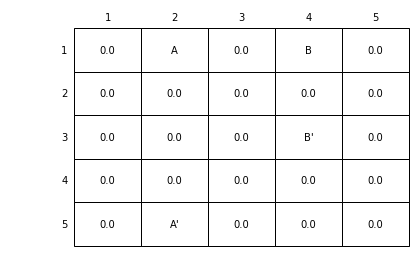

In [6]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!